# Predicting car prices using K-nearest neighbors

### Introduction

The goal of this project is to predict car prices based on different features by using the K-nearest neighbors algorithm.

This is a guided project from the Data Scientist in Python path from Dataquest. The dataset was collected and organized by Jeffrey C. Schlimmer using data from a few different sources, particularly "Ward's Automotive Yearbook" from 1985.
It can be accessed here: https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from matplotlib import pyplot as plt
%matplotlib inline

### Data exploration and cleaning

The dataset is contained in the file `imports-85.data`. The file does not have the column headers, so we need to add them manually using the information from the website that hosts the dataset. 

In [2]:
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
# reading the data

cars = pd.read_csv('imports-85.data', names=column_names)

In [4]:
# checking the first five rows
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# checking column types and null values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

There are no null values in the dataset. However, our inspection of the first few rows showed that some rows in the `normalized loss` column have a '?' value. It's posible this is how null values are represented in the dataset. So let's replace all '?' values in the dataset with Python's NaN ('Not a Number') values so that we can identify them and deal with them more easily.

In [6]:
cars.replace('?', np.nan, inplace=True)

In [7]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# checking column types and null values

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

Indeed we can now see that some null values were 'hiding' behind those '?'s. Also, our target variable `price` has 4 null values. We are going to simply remove the rows where `price` is null. 

In [9]:
cars = cars.dropna(subset=['price'])

Let's have a closer look at which columns have null values.

In [10]:
cars.isna().sum().sort_values(ascending=False)

normalized-losses    37
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
price                 0
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

For this project, we are going to use columns with continuous, numeric values to predict car prices. Therefore, before we continue dealing with the null values, let's create a dataframe with just the continuous columns. We can use the dataset documentation to help us get more information about what each column represents. 

In [11]:
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
            'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
            'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [12]:
numeric_cars = cars[num_cols]

In [13]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-size          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression-ratio    201 non-null float64
horsepower           199 non-null object
peak-rpm             199 non-null object
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 25.1+ KB


Some columns have the wrong data type (`object`). We need to convert them into numeric.  

In [14]:
numeric_cars = numeric_cars.astype('float')

In [15]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
engine-size          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           199 non-null float64
peak-rpm             199 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


Perfecto!! Now we can finally deal with those missing values. In this case, we are going to replace them by the column mean.

In [16]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

Let's check to see if it worked.

In [17]:
numeric_cars.isna().sum().sort_values(ascending=False)

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
engine-size          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
normalized-losses    0
dtype: int64

Great!

### Preparing features for machine learning

Before we can start with the model training, we need to normalize the data so that all features have the same scale.

In [18]:
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

Let's have a look at a random sample from the dataset to see how it looks.

In [19]:
normalized_cars.sample(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,0.282558
66,0.298429,0.533528,0.505970,0.495726,0.550000,0.470132,0.275472,0.635714,0.747619,0.93750,0.112150,0.020408,0.500000,0.605263,0.328335
79,0.502618,0.186589,0.241791,0.299145,0.250000,0.254849,0.139623,0.350000,0.628571,0.03750,0.252336,0.551020,0.305556,0.368421,0.063825
196,0.198953,0.516035,0.711940,0.589744,0.700000,0.561288,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.305556,0.315789,0.269773
148,0.104712,0.300292,0.485075,0.435897,0.591667,0.361521,0.177358,0.771429,0.271429,0.12500,0.158879,0.265306,0.277778,0.342105,0.071868
123,0.047120,0.486880,0.500000,0.367521,1.000000,0.406129,0.230189,0.578571,0.661905,0.09375,0.186916,0.346939,0.305556,0.368421,0.094409
65,0.277487,0.533528,0.505970,0.495726,0.550000,0.458495,0.298113,0.871429,0.519048,0.06250,0.336449,0.346939,0.166667,0.289474,0.326746
125,0.633508,0.230321,0.414925,0.683761,0.200000,0.500388,0.339623,1.000000,0.495238,0.15625,0.443925,0.551020,0.166667,0.289474,0.419542
124,0.298429,0.271137,0.479104,0.512821,0.200000,0.515904,0.358491,0.750000,0.852381,0.00000,0.453271,0.346939,0.166667,0.210526,0.189812
30,0.376963,0.000000,0.052239,0.307692,0.250000,0.087277,0.116981,0.264286,0.638095,0.16250,0.046729,0.265306,1.000000,1.000000,0.033787


We don't want our target column `price` to be normalized, since we are interested in predicting its values. So we can use the `price` column of our non-normalized dataframe instead.  

In [20]:
normalized_cars['price'] = numeric_cars['price']

In [21]:
# assigning the normalized dataframe back to numeric_cars

numeric_cars = normalized_cars

In [22]:
numeric_cars.sample(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
98,0.539267,0.247813,0.317910,0.299145,0.458333,0.201707,0.135849,0.435714,0.580952,0.15000,0.098131,0.428571,0.500000,0.552632,8249.0
154,0.083770,0.265306,0.426866,0.282051,0.941667,0.311094,0.116981,0.364286,0.457143,0.12500,0.065421,0.265306,0.388889,0.421053,7898.0
114,0.298429,0.804665,0.862687,0.692308,0.908333,0.774631,0.343396,0.828571,0.690476,0.87500,0.219626,0.000000,0.333333,0.236842,17075.0
133,0.204188,0.364431,0.679104,0.529915,0.691667,0.468192,0.226415,0.714286,0.476190,0.14375,0.289720,0.448980,0.222222,0.315789,12170.0
195,0.047120,0.516035,0.711940,0.589744,0.808333,0.599690,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,13415.0
88,0.376963,0.282799,0.467164,0.435897,0.316667,0.354926,0.184906,0.450000,0.661905,0.03125,0.317757,0.551020,0.277778,0.368421,9279.0
111,0.502618,0.620991,0.680597,0.692308,0.741667,0.615593,0.222642,0.657143,0.057143,0.08750,0.219626,0.346939,0.166667,0.210526,15580.0
36,0.068063,0.288630,0.238806,0.307692,0.875000,0.207913,0.116981,0.271429,0.638095,0.13750,0.130841,0.755102,0.472222,0.473684,7295.0
182,0.298429,0.311953,0.456716,0.444444,0.658333,0.299845,0.135849,0.335714,0.633333,1.00000,0.018692,0.265306,0.666667,0.789474,7775.0
120,0.465969,0.206997,0.241791,0.299145,0.233333,0.185803,0.109434,0.307143,0.552381,0.15000,0.093458,0.551020,0.500000,0.578947,6229.0


### Model training

In this section, we are going to try a few different models and parameters and see how well they can predict the car prices using the k-nearest neighbors algorithm. 

Let's start with a simple model that uses only one variable as a predictor. We are going to build a function to help us with that. It starts by randomly shuffling the rows of the dataframe and then dividing it into a training set with 80 % of the rows and a test set with the rest. Then it trains the model using the selected column/feature from the training set, uses the model to make predictions on the test set, and finally calculates and returns our error metric, the root mean squared error (rmse). 

In [23]:
np.random.seed(42)


def knn_train_test(train_col, target_col, df):
    train_size = int(len(df) * 0.80)
    new_index = np.random.permutation(df.index)
    df = df.reindex(new_index)
    train_set = df.iloc[:train_size]
    test_set = df.iloc[train_size:]
    model = KNeighborsRegressor()
    model.fit(train_set[[train_col]], train_set[target_col])
    predictions = model.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

We can try it on the `height` column to see if it works. 

In [24]:
knn_train_test('height', 'price', numeric_cars)

7280.089390365156

Seems good! Now we can try it on each of our feature columns and see which ones have the best results (ie. lower rmse).

In [25]:
rmse_dic = {}
rmse_list = []
feature_cols = list(numeric_cars.columns)
feature_cols.remove('price')

for col in feature_cols:
    print('\n-------------------\nCOLUMN NAME: ', col)
    rmse = knn_train_test(col, 'price', numeric_cars)
    print('RMSE: ', rmse)
    rmse_dic[col] = rmse
    rmse_list.append((rmse, col))


-------------------
COLUMN NAME:  normalized-losses
RMSE:  7003.840116435081

-------------------
COLUMN NAME:  wheel-base
RMSE:  6022.230610079259

-------------------
COLUMN NAME:  length
RMSE:  5327.19008135873

-------------------
COLUMN NAME:  width
RMSE:  4479.642471034121

-------------------
COLUMN NAME:  height
RMSE:  8737.147461048002

-------------------
COLUMN NAME:  curb-weight
RMSE:  4647.174474147784

-------------------
COLUMN NAME:  engine-size
RMSE:  3356.235772700008

-------------------
COLUMN NAME:  bore
RMSE:  6517.997041812245

-------------------
COLUMN NAME:  stroke
RMSE:  5894.553784142303

-------------------
COLUMN NAME:  compression-ratio
RMSE:  6050.455284784009

-------------------
COLUMN NAME:  horsepower
RMSE:  3942.3444338517593

-------------------
COLUMN NAME:  peak-rpm
RMSE:  6372.191526679257

-------------------
COLUMN NAME:  city-mpg
RMSE:  5683.7569819833

-------------------
COLUMN NAME:  highway-mpg
RMSE:  4182.058861724309


In [26]:
smallest_rmse = min(rmse_dic, key=rmse_dic.get)

In [27]:
smallest_rmse

'engine-size'

In [28]:
rmse_dic

{'normalized-losses': 7003.840116435081,
 'wheel-base': 6022.230610079259,
 'length': 5327.19008135873,
 'width': 4479.642471034121,
 'height': 8737.147461048002,
 'curb-weight': 4647.174474147784,
 'engine-size': 3356.235772700008,
 'bore': 6517.997041812245,
 'stroke': 5894.553784142303,
 'compression-ratio': 6050.455284784009,
 'horsepower': 3942.3444338517593,
 'peak-rpm': 6372.191526679257,
 'city-mpg': 5683.7569819833,
 'highway-mpg': 4182.058861724309}

In [29]:
sorted(rmse_list)

[(3356.235772700008, 'engine-size'),
 (3942.3444338517593, 'horsepower'),
 (4182.058861724309, 'highway-mpg'),
 (4479.642471034121, 'width'),
 (4647.174474147784, 'curb-weight'),
 (5327.19008135873, 'length'),
 (5683.7569819833, 'city-mpg'),
 (5894.553784142303, 'stroke'),
 (6022.230610079259, 'wheel-base'),
 (6050.455284784009, 'compression-ratio'),
 (6372.191526679257, 'peak-rpm'),
 (6517.997041812245, 'bore'),
 (7003.840116435081, 'normalized-losses'),
 (8737.147461048002, 'height')]

The best feature for the model with one predictor variable and the default number of neighbors (5) was `engine-size`. Now let's create a new function that allows us to choose a value for k (number of neighbors). 

In [30]:
def knn_train_test(train_col, target_col, df, k):
    train_size = int(len(df) * 0.80)
    new_index = np.random.permutation(df.index)
    df = df.reindex(new_index)
    train_set = df.iloc[:train_size]
    test_set = df.iloc[train_size:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[[train_col]], train_set[target_col])
    predictions = model.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [31]:
k_values = [1, 3, 5, 7, 9]


In [32]:
rmse_results = {}
for col in feature_cols:
    rmse_results[col] = {1:0, 3:0, 5:0, 7:0}
    print('\n------------------------\nCOLUMN NAME: ', col)
    for k in k_values:
        rmse = knn_train_test(col, 'price', numeric_cars, k)
        rmse_results[col][k] = rmse
        print('\n>>>>>k-value: ', k)
        print('\n:::RMSE: ', rmse)
        



------------------------
COLUMN NAME:  normalized-losses

>>>>>k-value:  1

:::RMSE:  9467.887452060151

>>>>>k-value:  3

:::RMSE:  5115.521971475679

>>>>>k-value:  5

:::RMSE:  7144.270254563716

>>>>>k-value:  7

:::RMSE:  5154.029645999015

>>>>>k-value:  9

:::RMSE:  7079.305820979606

------------------------
COLUMN NAME:  wheel-base

>>>>>k-value:  1

:::RMSE:  6405.876722616964

>>>>>k-value:  3

:::RMSE:  5432.614024160133

>>>>>k-value:  5

:::RMSE:  3189.5041140682883

>>>>>k-value:  7

:::RMSE:  4920.606426577547

>>>>>k-value:  9

:::RMSE:  4784.346401664195

------------------------
COLUMN NAME:  length

>>>>>k-value:  1

:::RMSE:  7750.236093964823

>>>>>k-value:  3

:::RMSE:  4930.6437562400015

>>>>>k-value:  5

:::RMSE:  5770.482298142048

>>>>>k-value:  7

:::RMSE:  5640.410490491308

>>>>>k-value:  9

:::RMSE:  5717.3997285591

------------------------
COLUMN NAME:  width

>>>>>k-value:  1

:::RMSE:  5421.046310221023

>>>>>k-value:  3

:::RMSE:  5685.730947901433

In [33]:
rmse_results

{'normalized-losses': {1: 9467.887452060151,
  3: 5115.521971475679,
  5: 7144.270254563716,
  7: 5154.029645999015,
  9: 7079.305820979606},
 'wheel-base': {1: 6405.876722616964,
  3: 5432.614024160133,
  5: 3189.5041140682883,
  7: 4920.606426577547,
  9: 4784.346401664195},
 'length': {1: 7750.236093964823,
  3: 4930.6437562400015,
  5: 5770.482298142048,
  7: 5640.410490491308,
  9: 5717.3997285591},
 'width': {1: 5421.046310221023,
  3: 5685.730947901433,
  5: 5276.886209711548,
  7: 5641.054900481284,
  9: 3996.3348363292857},
 'height': {1: 8445.592932151641,
  3: 8301.603916434815,
  5: 9113.609059144836,
  7: 10155.245361237648,
  9: 9827.436744547478},
 'curb-weight': {1: 5105.459129875517,
  3: 3825.3991286171613,
  5: 5508.48606885156,
  7: 4711.109045598728,
  9: 3500.758946449217},
 'engine-size': {1: 4269.891276390433,
  3: 3972.968391872559,
  5: 2938.0112794284473,
  7: 4830.569446576471,
  9: 3808.7270865966025},
 'bore': {1: 7739.968502173258,
  3: 8699.168721616708,

Let's organize the results in a dataframe so that we can see them better. 

In [34]:
df_rmse = pd.DataFrame(rmse_results)

In [35]:
df_rmse.index.name = 'k'

In [36]:
df_rmse

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
k,,,,,,,,,,,,,,
1,9467.887452,6405.876723,7750.236094,5421.046310,8445.592932,5105.459130,4269.891276,7739.968502,6318.471205,5403.654019,3191.109934,9406.772870,4793.126005,5649.727220
3,5115.521971,5432.614024,4930.643756,5685.730948,8301.603916,3825.399129,3972.968392,8699.168722,8124.158330,7935.603501,3295.030779,7577.496338,3596.998336,5709.739740
5,7144.270255,3189.504114,5770.482298,5276.886210,9113.609059,5508.486069,2938.011279,5451.384971,6013.497705,6259.362096,3887.100628,9773.670705,4708.114222,3842.236520
7,5154.029646,4920.606427,5640.410490,5641.054900,10155.245361,4711.109046,4830.569447,7536.424798,8081.822710,6735.295527,5295.968103,4688.776808,3421.118161,4071.181364
9,7079.305821,4784.346402,5717.399729,3996.334836,9827.436745,3500.758946,3808.727087,8043.607125,7235.094149,7361.774562,3838.496635,6573.093710,4769.138099,3460.223858


We can also plot the results. 

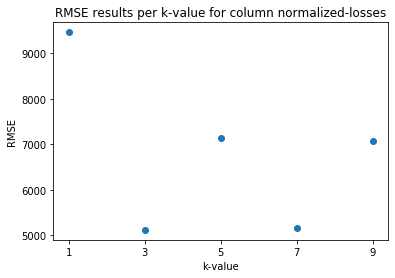

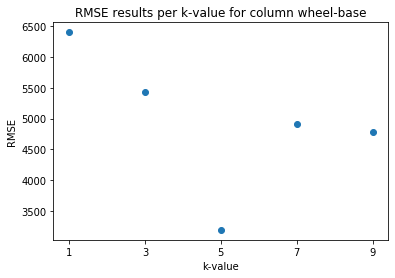

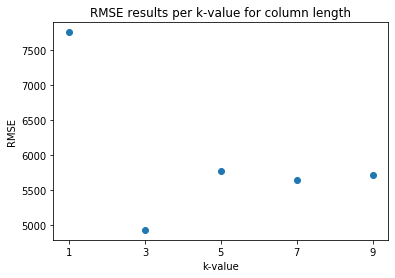

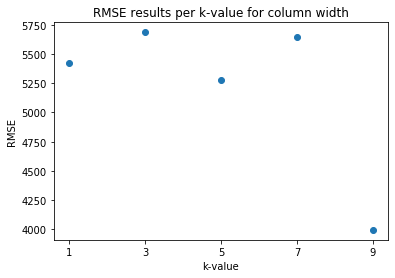

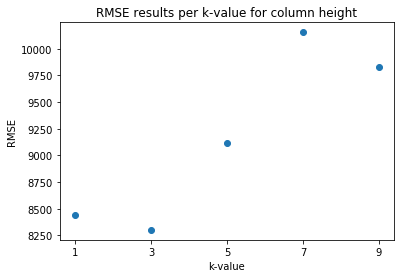

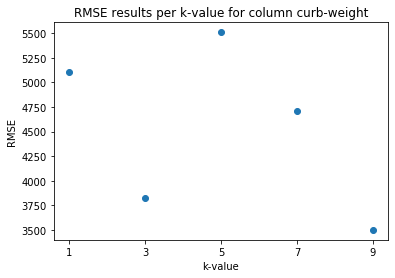

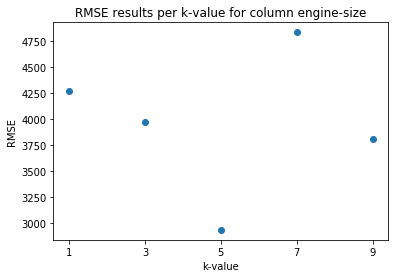

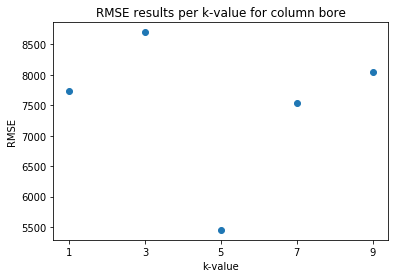

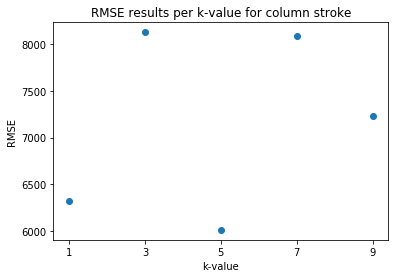

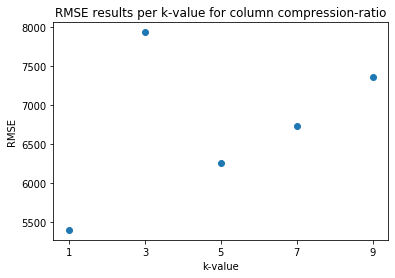

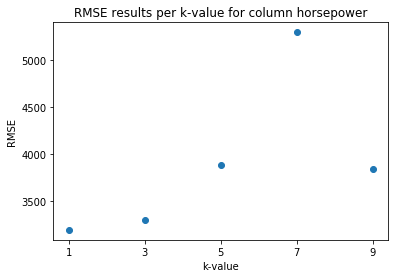

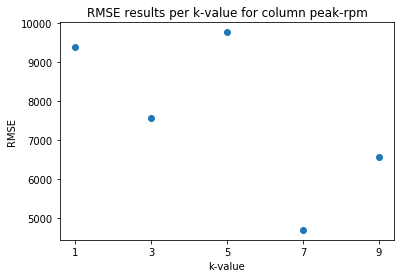

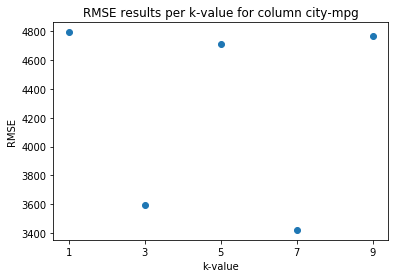

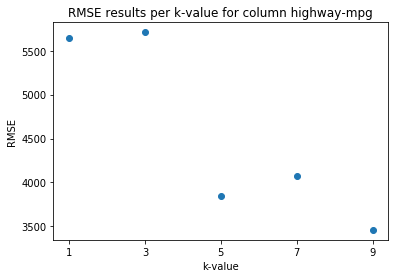

In [37]:
for col in df_rmse.columns:
    plt.scatter(df_rmse.index, df_rmse[col])
    plt.title('RMSE results per k-value for column ' + str(col))
    plt.xticks(k_values)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.show()

In [38]:
rmse_results

{'normalized-losses': {1: 9467.887452060151,
  3: 5115.521971475679,
  5: 7144.270254563716,
  7: 5154.029645999015,
  9: 7079.305820979606},
 'wheel-base': {1: 6405.876722616964,
  3: 5432.614024160133,
  5: 3189.5041140682883,
  7: 4920.606426577547,
  9: 4784.346401664195},
 'length': {1: 7750.236093964823,
  3: 4930.6437562400015,
  5: 5770.482298142048,
  7: 5640.410490491308,
  9: 5717.3997285591},
 'width': {1: 5421.046310221023,
  3: 5685.730947901433,
  5: 5276.886209711548,
  7: 5641.054900481284,
  9: 3996.3348363292857},
 'height': {1: 8445.592932151641,
  3: 8301.603916434815,
  5: 9113.609059144836,
  7: 10155.245361237648,
  9: 9827.436744547478},
 'curb-weight': {1: 5105.459129875517,
  3: 3825.3991286171613,
  5: 5508.48606885156,
  7: 4711.109045598728,
  9: 3500.758946449217},
 'engine-size': {1: 4269.891276390433,
  3: 3972.968391872559,
  5: 2938.0112794284473,
  7: 4830.569446576471,
  9: 3808.7270865966025},
 'bore': {1: 7739.968502173258,
  3: 8699.168721616708,

Let's check which column and k value got the minimum rmse. 

In [39]:
df_rmse.min().sort_values()

engine-size          2938.011279
wheel-base           3189.504114
horsepower           3191.109934
city-mpg             3421.118161
highway-mpg          3460.223858
curb-weight          3500.758946
width                3996.334836
peak-rpm             4688.776808
length               4930.643756
normalized-losses    5115.521971
compression-ratio    5403.654019
bore                 5451.384971
stroke               6013.497705
height               8301.603916
dtype: float64

In [40]:
df_rmse['engine-size']

k
1    4269.891276
3    3972.968392
5    2938.011279
7    4830.569447
9    3808.727087
Name: engine-size, dtype: float64

This result confirms our earlier test. The best column for creating a k nearest neighbors model with one feature is `engine-size` with a k value of 5. 

In any case, let's also have a look at the `wheel-base` and `horsepower` columns, which also performed relatively well.  

In [41]:
df_rmse[['wheel-base', 'horsepower']]

,wheel-base,horsepower
k,,
1,6405.876723,3191.109934
3,5432.614024,3295.030779
5,3189.504114,3887.100628
7,4920.606427,5295.968103
9,4784.346402,3838.496635


Interestingly, while the best result we got from the `wheel-base` column was also the one where we used a k value of 5, for the `horsepower` column the best performance came from a k value of 1!

Now let's make a function that allows us to create a model with multiple features. For now, let's use the default k value of 5.

In [42]:
def knn_train_test(train_cols, target_col, df):
    train_size = int(len(df) * 0.80)
    new_index = np.random.permutation(df.index)
    df = df.reindex(new_index)
    train_set = df.iloc[:train_size]
    test_set = df.iloc[train_size:]
    model = KNeighborsRegressor()
    model.fit(train_set[train_cols], train_set[target_col])
    predictions = model.predict(test_set[train_cols])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [43]:
# save the top 5 features in a variable

top5_features = list(df_rmse.min().sort_values().index[:5])

In [44]:
top5_features

['engine-size', 'wheel-base', 'horsepower', 'city-mpg', 'highway-mpg']

Now let's train different models with the top 2, 3, 4 and 5 features and see how they perform. 

In [45]:
for i in range(2, 6):
    features = top5_features[:i]
    print('\n\n------------------------\n\nCOLUMNS:', features, '\n')
    print('RMSE:', knn_train_test(features, 'price', numeric_cars))



------------------------

COLUMNS: ['engine-size', 'wheel-base'] 

RMSE: 2875.564941821719


------------------------

COLUMNS: ['engine-size', 'wheel-base', 'horsepower'] 

RMSE: 3357.509662481783


------------------------

COLUMNS: ['engine-size', 'wheel-base', 'horsepower', 'city-mpg'] 

RMSE: 2818.3485295730084


------------------------

COLUMNS: ['engine-size', 'wheel-base', 'horsepower', 'city-mpg', 'highway-mpg'] 

RMSE: 5263.892509003339


As we can see, our top 3 performing models were the ones with 4, 5 and 2 features.   

In [46]:
# saving the top 3 models features

topmodel1 = ['engine-size', 'wheel-base', 'horsepower', 'city-mpg']
topmodel2 = ['engine-size', 'wheel-base', 'horsepower', 'city-mpg', 'highway-mpg']
topmodel3 = ['engine-size', 'wheel-base']

Now we can try different hyperparameter values for each of these models and see if we can optimize them. 

To do that, we are going to create a new function that allows us to choose the k value, and then we'll build several models with k values ranging from 1 to 25.

In [47]:
def knn_train_test(train_cols, target_col, df, k):
    train_size = int(len(df) * 0.80)
    new_index = np.random.permutation(df.index)
    df = df.reindex(new_index)
    train_set = df.iloc[:train_size]
    test_set = df.iloc[train_size:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[train_cols], train_set[target_col])
    predictions = model.predict(test_set[train_cols])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

In [48]:
models_rmses = {'model1': {}, 'model2': {}, 'model3': {}}

In [49]:
k_values = [i for i in range(1,26)]

In [50]:
models_dic = {'model1': topmodel1, 'model2': topmodel2, 'model3': topmodel3}


In [51]:
for key, value in models_dic.items():
    for k in k_values:
        models_rmses[key][k] = knn_train_test(value, 'price', numeric_cars, k)

In [52]:
models_rmses


{'model1': {1: 3484.0604850396376,
  2: 3143.958169173406,
  3: 3735.8616475081744,
  4: 4214.826673627222,
  5: 2648.8122315575297,
  6: 2358.049134962995,
  7: 2594.8979070157548,
  8: 2578.694907593407,
  9: 3411.5823689988365,
  10: 3752.6589915782615,
  11: 4855.828946213832,
  12: 3399.50322119492,
  13: 3144.1794615386802,
  14: 5617.612283760516,
  15: 4327.832934575166,
  16: 4813.151320927679,
  17: 4618.907516616762,
  18: 3699.2236201838173,
  19: 4906.534732387994,
  20: 3006.3536523584144,
  21: 4055.7852295818134,
  22: 4529.51311210769,
  23: 5444.783654444756,
  24: 3221.8186225317227,
  25: 3667.403588472567},
 'model2': {1: 3333.3791175717492,
  2: 3028.064340868441,
  3: 1928.3028196389805,
  4: 2862.52583650072,
  5: 2857.98020474805,
  6: 2649.7495715643436,
  7: 2181.616880330631,
  8: 3518.8121950055124,
  9: 5060.929071449737,
  10: 3983.967361140669,
  11: 4109.7909153225555,
  12: 3463.4769625168324,
  13: 5109.308279471356,
  14: 5570.097860056613,
  15: 447

Let's turn these results into a dataframe so that we can visualize them better. 

In [53]:
df_final = pd.DataFrame(models_rmses)

In [54]:
df_final

,model1,model2,model3
1,3484.060485,3333.379118,3848.016100
2,3143.958169,3028.064341,3175.277726
3,3735.861648,1928.302820,4811.549105
4,4214.826674,2862.525837,4772.591404
5,2648.812232,2857.980205,3239.667184
6,2358.049135,2649.749572,3383.464015
7,2594.897907,2181.616880,4877.401001
8,2578.694908,3518.812195,3659.481561
9,3411.582369,5060.929071,5785.796329
10,3752.658992,3983.967361,5544.476437


In [55]:
df_final.min()

model1    2358.049135
model2    1928.302820
model3    2678.079681
dtype: float64

Model 2 is the winner! Let's see which k value got the best performance.

In [56]:
df_final['model2'].sort_values()

3     1928.302820
7     2181.616880
6     2649.749572
5     2857.980205
4     2862.525837
2     3028.064341
17    3142.773002
16    3315.158233
1     3333.379118
12    3463.476963
8     3518.812195
22    3668.719330
23    3962.870479
10    3983.967361
11    4109.790915
20    4408.255477
15    4473.206902
9     5060.929071
25    5096.906630
13    5109.308279
18    5122.225550
24    5238.709713
21    5481.141687
14    5570.097860
19    5657.661407
Name: model2, dtype: float64

### Conclusions

In [57]:
print(' The best performing model had the following features:\n', topmodel2, '\n and a k value of 2')

 The best performing model had the following features:
 ['engine-size', 'wheel-base', 'horsepower', 'city-mpg', 'highway-mpg'] 
 and a k value of 2


We've definitely made progress, starting from our best performing one-feature model with the default k value of 5 which had a RMSE of 3356.24, all the way to our last model with 5 features and a k value of 2, which got us a RMSE value of 1942.24

We could keep optimizing by choosing different algorithms and using k-fold cross validation, for example. However, the goal of this exercise was just to demonstrate how we can improve model performance by tweaking its features and hyperparameters. 

Let's finish by plotting the RMSE of different k values for each of the top 3 models. That way we can clearly see how the performance of the model changes according to this hyperparameter.

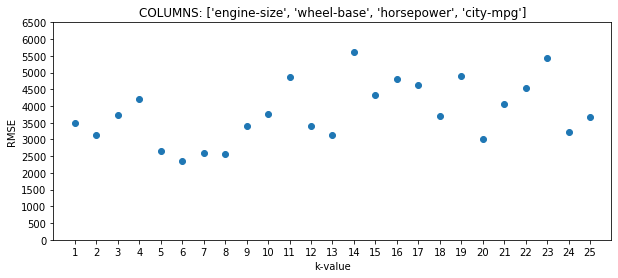

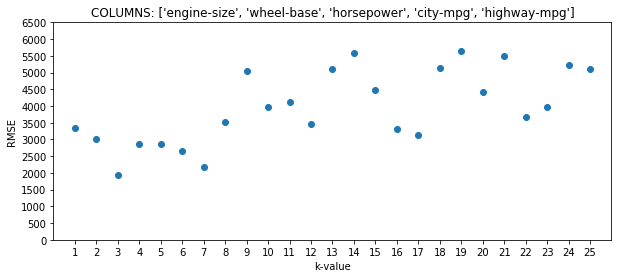

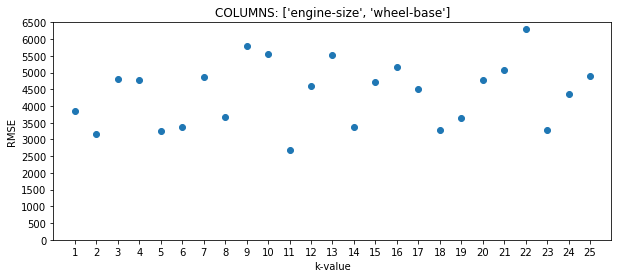

In [58]:
for key, value in models_dic.items():
    plt.figure(figsize=(10,4))
    plt.scatter(df_final.index, df_final[key])
    plt.xticks(k_values)
    plt.yticks(range(0, 7000, 500))
    plt.xlim(0, 26)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.title('COLUMNS: ' + str(value))
    plt.show()
    

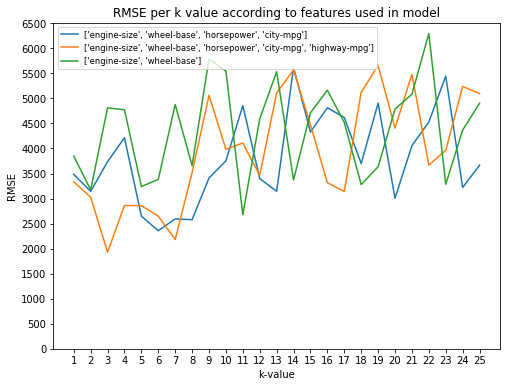

In [59]:
plt.figure(figsize=(8,6))
for key, value in models_dic.items():
    plt.plot(df_final.index, df_final[key], label=str(value))
plt.xticks(k_values)
plt.xlabel('k-value')
plt.ylabel('RMSE')
plt.yticks(range(0, 7000, 500))
plt.legend(loc=2, fontsize='small')
plt.title('RMSE per k value according to features used in model')
plt.show()

